<a href="https://colab.research.google.com/github/ganeshjaggineni/machine-learning/blob/main/Task11_random_forest_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=5, random_state=42, oob_score=True)

In [ ]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)


In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
# Display classification report
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Precision: Measures the accuracy of positive predictions. It's the ratio of true positives to the total number of positive predictions.
Recall: Measures the ability of the model to correctly identify all relevant instances. It's the ratio of true positives to the total number of actual positives.
F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall.
Support: The number of occurrences of each class in the true labels.

In [ ]:
# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


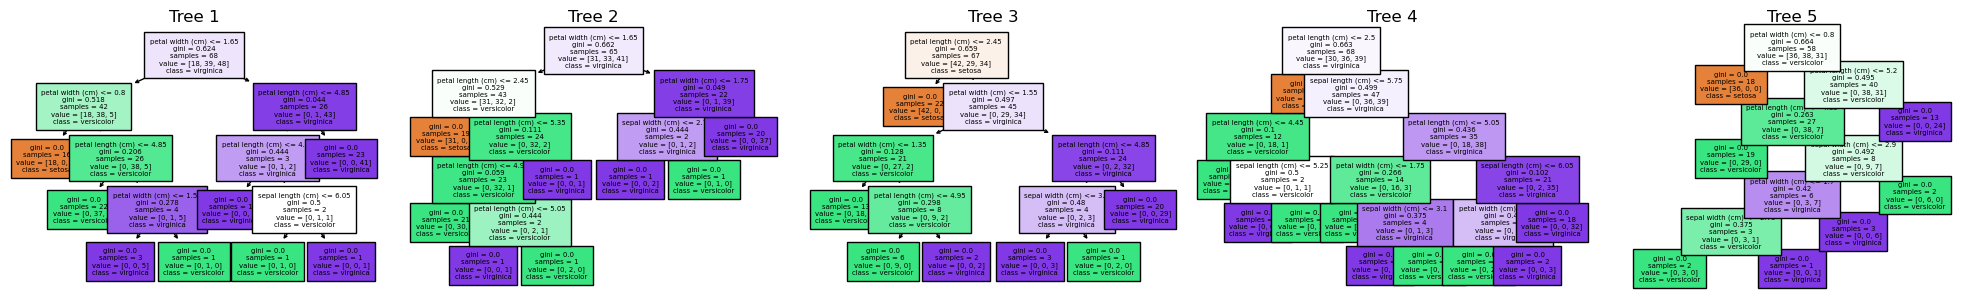

In [ ]:
plt.figure(figsize=(20, 14))
for i, tree in enumerate(rf_classifier.estimators_):
    plt.subplot(5, 5, i + 1)
    plot_tree(tree, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=5)
    plt.title(f'Tree {i + 1}')
plt.tight_layout()
plt.show()